# Lab 1: Binary Classification - Data Preparation and Basic Model

In this notebook, we'll create non-linear classification data (circles), split it into training and test sets, visualize it, and build our first classification model in PyTorch.

## Problem Statement

We have data points distributed in two concentric circles. Given a new point's coordinates (X1, X2), our goal is to predict which circle it belongs to — the **inner circle (Class 0)** or the **outer circle (Class 1)**.

![Binary Classification Problem](https://raw.githubusercontent.com/poridhiEng/lab-asset/c86bc88e676d50722669abf52c9c25213adc5b70/tensorcode/Deep-learning-with-pytorch/Classification/Lab_01/images/circles-problem.svg)

This is a **binary classification** problem — we predict one of two possible classes.

## Install Dependencies

First, let's install the required libraries by running the following cell.

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install matplotlib scikit-learn pandas

Looking in indexes: https://download.pytorch.org/whl/cpu


## Import Libraries

We need:
- `torch`: Core PyTorch library for tensors and neural networks
- `sklearn.datasets`: To generate classification data (circles)
- `matplotlib`: For visualization
- `pandas`: For viewing data in tabular format
- `sklearn.model_selection`: To split the data into training and test sets

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.9.0+cpu


## 1. Creating Classification Data

Unlike linear regression where we predicted continuous values, **classification** predicts discrete classes (categories).

We'll use `make_circles` from scikit-learn to create two concentric circles:
- **Inner circle**: Class 0 (red points)
- **Outer circle**: Class 1 (blue points)

The data is intentionally **non-linear** — you cannot draw a straight line to separate the two classes. This will be important later!

In [3]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,  # a little bit of noise to the dots
                    random_state=42)  # keep random state so we get the same values

print(f"X shape: {X.shape}")  # Features: 2D coordinates
print(f"y shape: {y.shape}")  # Labels: 0 or 1

X shape: (1000, 2)
y shape: (1000,)


### Exploring the Data

Let's view the first few samples to understand our data structure. Each sample has:
- **X**: Two features (X1, X2) representing coordinates on a 2D plane
- **y**: A label (0 or 1) indicating which circle the point belongs to

**How are labels decided?**

The `make_circles` function generates two concentric circles with specific radii:
- **Outer circle** (Class 1): radius = **1.0**
- **Inner circle** (Class 0): radius = **0.8** (default `factor=0.8`)

The label is based on which circle the point was generated on:
- If `distance from center ≈ 0.8` → **Class 0** (inner)
- If `distance from center ≈ 1.0` → **Class 1** (outer)

Where distance = `√(X1² + X2²)`

In [4]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


### Viewing Data as a DataFrame

Let's put our data into a pandas DataFrame to see it in a nice tabular format. Each row represents one sample with its X1, X2 coordinates and the class label.

In [ ]:
# 2️⃣ Basic DataFrame তৈরি করা
# 2.1 Dictionary থেকে
# data = {
#     "Name": ["Alice", "Bob", "Charlie"],
#     "Age": [25, 30, 22],
#     "City": ["Dhaka", "Chittagong", "Khulna"]
# }

# df = pd.DataFrame(data)
# print(df)


# Output:

#       Name  Age        City
# 0    Alice   25       Dhaka
# 1      Bob   30  Chittagong
# 2  Charlie   22      Khulna


# ✅ প্রতিটা key = column name
# ✅ value = column data (list/array)

# 2.2 List of lists / tuples থেকে
# data = [
#     ["Alice", 25, "Dhaka"],
#     ["Bob", 30, "Chittagong"],
#     ["Charlie", 22, "Khulna"]
# ]

# df = pd.DataFrame(data, columns=["Name", "Age", "City"])
# print(df)


# এখানে columns দিয়ে নাম assign করা হচ্ছে

# 2.3 NumPy array থেকে
# import numpy as np

# X = np.array([[1, 2], [3, 4], [5, 6]])
# y = np.array([0, 1, 0])

# df = pd.DataFrame({
#     "Feature1": X[:, 0],
#     "Feature2": X[:, 1],
#     "Label": y
# })

# print(df)


# Output:

#    Feature1  Feature2  Label
# 0         1         2      0
# 1         3         4      1
# 2         5         6      0


# ✅ এটা circles dataset-এর মত structure এর জন্য perfect

# 2.4 Empty DataFrame বানানো
# df = pd.DataFrame(columns=["Name", "Age", "City"])
# print(df)


# Output:

# Empty DataFrame
# Columns: [Name, Age, City]
# Index: []


# পরে .loc বা .append() দিয়ে row যোগ করা যায়

# 2.5 Row add করা
# df.loc[0] = ["Alice", 25, "Dhaka"]
# df.loc[1] = ["Bob", 30, "Chittagong"]
# print(df)

In [5]:
# Make DataFrame of circle data
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


### Checking Class Balance

It's important to check if our classes are balanced. An imbalanced dataset (e.g., 90% class 0, 10% class 1) can cause problems during training.

In [6]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


500 samples in each class — perfectly balanced!

## 2. Visualizing the Data

Let's plot our data to see the two circles. The color represents the class:
- **Blue**: Class 0 (inner circle, radius ≈ 0.8)
- **Red**: Class 1 (outer circle, radius ≈ 1.0)

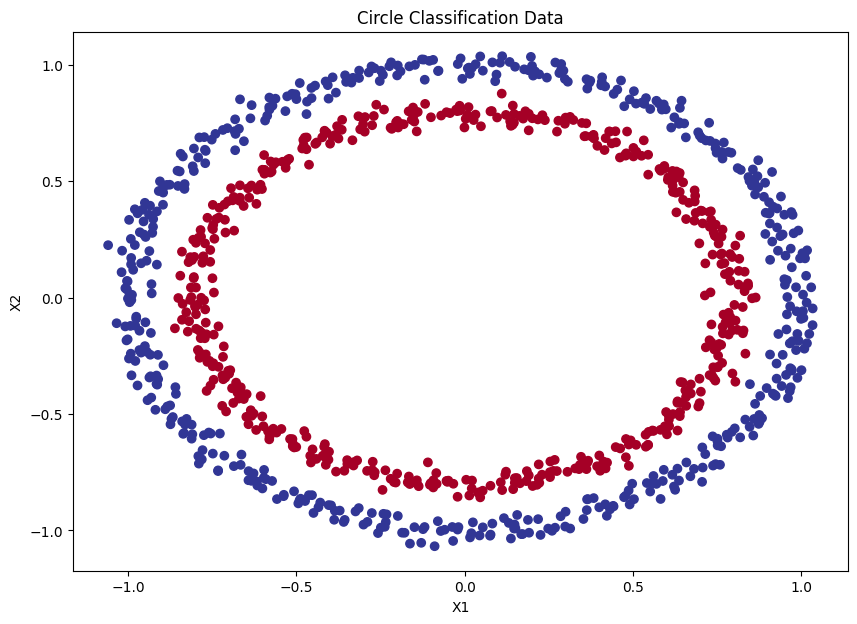

In [7]:
plt.figure(figsize=(10, 7))
plt.scatter(
    x=X[:, 0],
    y=X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu_r  # reversed colormap
)
plt.title("Circle Classification Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## 3. Input and Output Shapes and Data Type

Before building a model, we need to understand our data's shape:
- **Input (X)**: 1000 samples, each with 2 features → shape `[1000, 2]`
- **Output (y)**: 1000 labels, each is 0 or 1 → shape `[1000]`

This tells us our model needs:
- **Input layer**: 2 features (X1, X2)
- **Output layer**: 1 value (probability of being class 1)

In [8]:
# Check the shapes of our features and labels
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1000, 2)
y shape: (1000,)


In [9]:
# Check data type - currently NumPy arrays
type(X)

numpy.ndarray

In [10]:
# Labels are also NumPy arrays - need to convert to tensors
type(y)

numpy.ndarray

## 4. Turn Data into Tensors and Split

PyTorch works with tensors, not NumPy arrays. We need to:
1. Convert X and y from NumPy arrays to PyTorch tensors
2. Split into training (80%) and test (20%) sets

We use `torch.float` for X (features) because neural networks work with floating point numbers.

In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
print("First 5 X samples:")
print(X[:5])
print("\nFirst 5 y labels:")
print(y[:5])

First 5 X samples:
tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

First 5 y labels:
tensor([1., 1., 1., 1., 0.])


In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,  # 20% test, 80% train
                                                    random_state=42)  # reproducible split

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 800
Test samples: 200


We have 800 samples for training and 200 for testing.

## 5. Building a Classification Model

Now let's build our first classification model. It's similar to linear regression, but designed for classification:

**Model Architecture:**
- **Input Layer**: Takes 2 features (X1, X2)
- **Hidden Layer**: 5 neurons (learns patterns)
- **Output Layer**: 1 neuron (predicts class probability)

![Neural Network Architecture](https://raw.githubusercontent.com/poridhiEng/lab-asset/c86bc88e676d50722669abf52c9c25213adc5b70/tensorcode/Deep-learning-with-pytorch/Classification/Lab_01/images/network.svg)

The diagram above shows our network structure: 2 input neurons receive the coordinates (X1, X2), 5 hidden neurons learn to detect patterns in the data, and 1 output neuron produces the class prediction.

**Code Breakdown:**
- `nn.Module`: Base class for all PyTorch models
- `__init__`: Defines the layers (what the model has)
- `forward`: Defines how data flows through the layers (what the model does)
- `nn.Linear(in, out)`: A fully connected layer that transforms `in` features to `out` features

This is a simple neural network with only **linear layers** (no activation functions between layers). We'll see why this is a problem!

In [13]:
# Build the model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5)  # takes in 2 features, produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1)  # takes in 5 features, produces 1 feature

    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x))  # x -> layer_1 -> layer_2 -> output

# Create an instance of the model
model_0 = CircleModelV0()
print(model_0)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


### Alternative: Using nn.Sequential

We can also build the same model using `nn.Sequential`, which is more concise.

`nn.Sequential` performs a forward pass computation of the input data through the layers **in the order they appear**. So the data flows: Input → Layer 1 → Layer 2 → Output.

**When to use which?**
- `nn.Sequential`: Quick and simple when layers just stack one after another
- `nn.Module` class: When you need more control over how data flows through the model

In [14]:
# Replicate CircleModelV0 with nn.Sequential
model_0_sequential = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

print(model_0_sequential)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)


## 6. Setting Up Loss Function and Optimizer

For binary classification, we use:

**Loss Function: `nn.BCEWithLogitsLoss()`**
- BCE = Binary Cross Entropy
- "WithLogits" means it applies sigmoid internally
- Measures how wrong our predictions are for binary classification

**Why `BCEWithLogitsLoss` instead of `BCELoss`?**
- `nn.BCELoss()`: Expects probabilities (0-1), so you must apply sigmoid yourself
- `nn.BCEWithLogitsLoss()`: Has sigmoid built-in, takes raw logits directly

Using `BCEWithLogitsLoss` is recommended because it's more numerically stable and convenient.

**BCE Formula:**
$$\text{BCE} = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})]$$

Where:
- **y** = target label (0 or 1)
- **ŷ** = predicted probability (between 0 and 1)

When the model is confident and correct → **low loss**. When the model is wrong or uncertain → **high loss**.

**Optimizer: `SGD` (Stochastic Gradient Descent)**
- Updates model parameters to reduce loss
- `lr=0.1` is the learning rate (how big the update steps are)

In [15]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

print(f"Loss function: {loss_fn}")
print(f"Optimizer: {optimizer}")

Loss function: BCEWithLogitsLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


### Accuracy Function

We also need a way to measure how accurate our predictions are. Accuracy = (correct predictions / total predictions) × 100%

In [16]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions."""
    correct = torch.eq(y_true, y_pred).sum().item()  # count matching predictions
    acc = (correct / len(y_pred)) * 100
    return acc

## 7. Understanding Model Outputs: Logits → Probabilities → Labels

Our model outputs **raw logits** (unbounded numbers). We need to convert these to class predictions:

1. **Logits** (raw output) → can be any number (-∞ to +∞)
2. **Probabilities** (after sigmoid) → between 0 and 1
3. **Labels** (after rounding) → 0 or 1

Let's see this in action with our untrained model.

In [17]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]

print("Raw logits (model output):")
print(y_logits)

Raw logits (model output):
tensor([[ 0.2261],
        [ 0.4638],
        [-0.2717],
        [ 0.3666],
        [-0.0723]])


In [18]:
# Use sigmoid on model logits to get prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)

print("Prediction probabilities (after sigmoid):")
print(y_pred_probs)

Prediction probabilities (after sigmoid):
tensor([[0.5563],
        [0.6139],
        [0.4325],
        [0.5906],
        [0.4819]])


In [19]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

print("Predicted labels (after rounding):")
print(y_preds.squeeze())

print("\nActual labels:")
print(y_test[:5])

Predicted labels (after rounding):
tensor([1., 1., 0., 1., 0.])

Actual labels:
tensor([1., 0., 1., 0., 1.])


## 8. Training the Model

Now let's train our model! The training loop is the heart of machine learning. Every training iteration follows these 5 steps:

1. **Zero Gradients** — Clear gradients from previous iteration
   ```python
   optimizer.zero_grad()
   ```
   PyTorch accumulates gradients by default. If we don't clear them, gradients from previous iterations would add up incorrectly.

2. **Forward Pass** — Make predictions using current parameters
   ```python
   y_pred = model(X_train)
   ```

3. **Calculate Loss** — Measure how wrong the predictions are
   ```python
   loss = loss_fn(y_pred, y_train)
   ```

4. **Backward Pass** — Compute gradients (how to adjust parameters)
   ```python
   loss.backward()
   ```

5. **Update Parameters** — Adjust weights using gradients
   ```python
   optimizer.step()
   ```

We'll train for 100 epochs and print progress every 10 epochs.

In [20]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()  # এটা model-কে training mode এ সেট করে।

    # 1. Zero gradients
    optimizer.zero_grad()

    # 2. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze()  # squeeze to remove extra dimensions
    y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> probs -> labels

    # 3. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)  # BCEWithLogitsLoss works with raw logits
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 4. Backward pass (backpropagation)
    loss.backward()

    # 5. Update parameters
    optimizer.step()

    ### Testing
    model_0.eval()   # model কে evaluation mode এ নেওয়া হচ্ছে
    with torch.inference_mode():     # 👉 PyTorch কে বলা হচ্ছে:, gradient হিসাব করো না ,memory কম ব্যবহার করো, faster execution ✅ Testing-এর জন্য perfect
        # Forward pass
        test_logits = model_0(X_test).squeeze()   # .squeeze() → [batch,1] → [batch]
        test_pred = torch.round(torch.sigmoid(test_logits))
        # Calculate loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70412, Accuracy: 51.88% | Test Loss: 0.71971, Test Acc: 47.50%
Epoch: 10 | Loss: 0.70067, Accuracy: 51.62% | Test Loss: 0.71393, Test Acc: 46.00%
Epoch: 20 | Loss: 0.69860, Accuracy: 51.25% | Test Loss: 0.71011, Test Acc: 46.50%
Epoch: 30 | Loss: 0.69723, Accuracy: 50.75% | Test Loss: 0.70738, Test Acc: 46.00%
Epoch: 40 | Loss: 0.69627, Accuracy: 50.88% | Test Loss: 0.70532, Test Acc: 46.50%
Epoch: 50 | Loss: 0.69555, Accuracy: 51.00% | Test Loss: 0.70371, Test Acc: 46.50%
Epoch: 60 | Loss: 0.69501, Accuracy: 50.62% | Test Loss: 0.70241, Test Acc: 47.00%
Epoch: 70 | Loss: 0.69460, Accuracy: 50.75% | Test Loss: 0.70134, Test Acc: 47.00%
Epoch: 80 | Loss: 0.69427, Accuracy: 50.75% | Test Loss: 0.70045, Test Acc: 47.00%
Epoch: 90 | Loss: 0.69401, Accuracy: 50.75% | Test Loss: 0.69971, Test Acc: 46.50%


## 9. Evaluating the Model

Let's make predictions with our trained model and see how it performs.

**Something's wrong!** Notice the accuracy is around 50% — that's basically random guessing for a two-class problem!

In [21]:
# Make predictions
model_0.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_0(X_test))).squeeze()

# Calculate final accuracy
final_acc = accuracy_fn(y_true=y_test, y_pred=y_preds)
print(f"Final Test Accuracy: {final_acc:.2f}%")

Final Test Accuracy: 46.50%


## 10. Visualizing Decision Boundaries

To understand why our model is performing poorly, let's visualize its **decision boundary** — the line/region where the model switches from predicting class 0 to class 1.

**How the `plot_decision_boundary` function works:**

1. **Create a grid of points**: We generate a mesh of points covering the entire plot area using `np.meshgrid`. This creates 101×101 = 10,201 points.

2. **Make predictions on the grid**: We pass all grid points through the model to get predictions for every location in the 2D space.

3. **Color the regions**: Using `plt.contourf`, we color each region based on what the model would predict for points in that area:
   - Blue region → Model predicts Class 0
   - Red region → Model predicts Class 1

4. **Overlay the actual data**: We scatter plot the real data points on top, so we can see how well the colored regions match the actual class distribution.

The boundary between the colored regions shows where the model's prediction changes from one class to another — this is the **decision boundary**.

In [22]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """Plots decision boundaries of model predicting on X in comparison to y."""
    # Put everything to CPU
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Binary classification
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

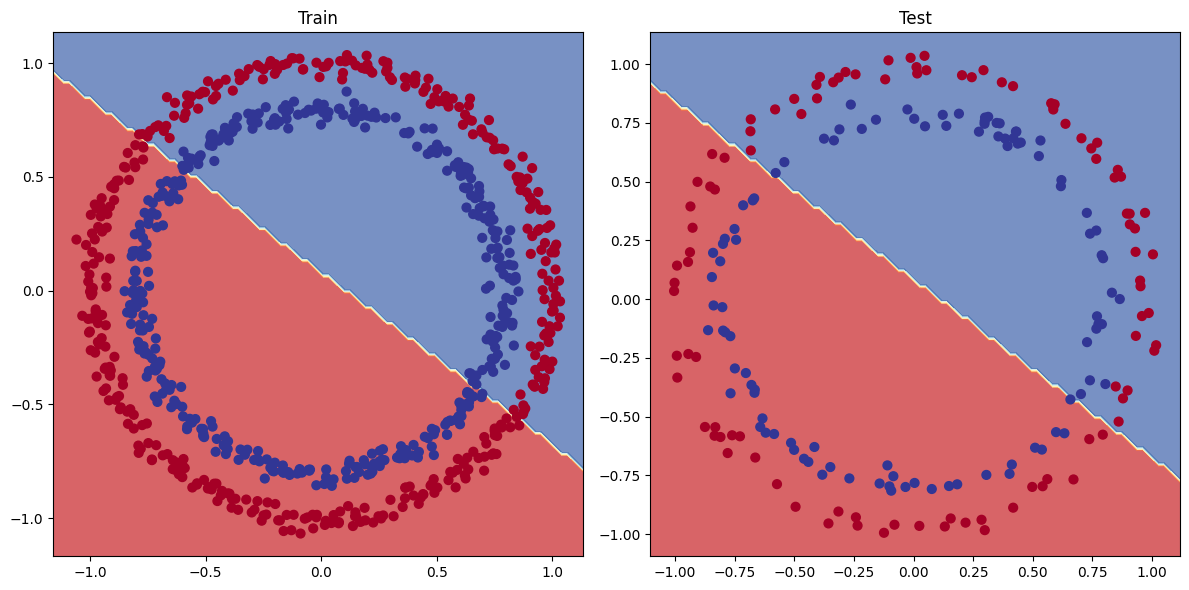

In [23]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.tight_layout()
plt.show()

## 11. Why Is The Model Failing?

Look at the decision boundary — **it's a straight line!**

Our model is trying to separate circles with a straight line, which is impossible. The model can only learn **linear patterns** because it only contains linear layers.

### The Problem: Linear Model for Non-Linear Data

Our circle data requires a **circular/curved decision boundary**, but our model can only create **straight lines**.

**Think about it**: No matter how you rotate or move a straight line, you can never perfectly separate the inner circle from the outer circle.

### The Solution (Coming in Lab 2)

To solve non-linear problems, we need **non-linear activation functions** like ReLU (Rectified Linear Unit). These allow our model to learn curved decision boundaries.

In Lab 2, we'll add ReLU activation functions and watch our model's accuracy improve significantly!

## Summary

In this lab, we:

1. **Created classification data** using `make_circles` — 1000 samples in two concentric circles
2. **Explored the data** using pandas and visualizations
3. **Split the data** into training (800 samples) and test (200 samples) sets
4. **Built a classification model** with two linear layers
5. **Trained the model** for 100 epochs
6. **Evaluated the model** — accuracy was only ~50% (random guessing!)
7. **Visualized decision boundaries** — the model can only draw straight lines

### Key Takeaway

**Linear models cannot solve non-linear problems.** Our model failed because it could only create straight-line decision boundaries, but our data requires circular boundaries.

### Next Steps

In **Lab 2**, we'll add non-linear activation functions (ReLU) to our model, enabling it to learn complex patterns and achieve much better accuracy!